In [1]:
import random
from itertools import combinations
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import numpy as np
from random import choices
import seaborn as sns
import os
from scipy.stats import binom, linregress
from scipy.stats import binom

sns.set()
np.random.seed(0)
sns.set(style="whitegrid")
sns.set_palette("Set3", 10)

In [2]:
G = nx.erdos_renyi_graph(500, 0.2)

In [7]:
T = 1000
mu = 0.5
beta = 0.5
Ts = 900

In [10]:
def simulation(G, T, Ts, p0, mu, beta):
    N = len(G.nodes())
    P0 = random.sample(G.nodes(),int(N*p0))
    for node in G:
        if node in P0:
            G.nodes[node]['state']='i'
        else:
            G.nodes[node]['state']='s'
    P = []
    for t in range(T):
        for node in G:
            if G.nodes[node]['state']=='i':
                if random.random() < mu:
                    G.nodes[node]['state']='s'
            elif G.nodes[node]['state']=='s':
                for neighbor in G.neighbors(node):
                    if G.nodes[neighbor]['state']=='i':
                        if random.random() < beta:
                            G.nodes[node]['state']='i'
                            break
        if t> Ts:
            p = np.sum([1 if G.nodes[node]['state']=='i' else 0 for node in G])/N
            P.append(p)
    return np.mean(P)

In [5]:
G = nx.erdos_renyi_graph(500, 0.2)

In [8]:
P= simulation(G, T, Ts, 0.2, mu, beta)

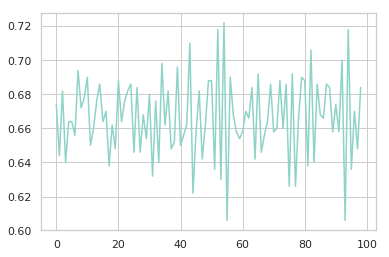

In [9]:
plt.plot(P)

In [13]:
Nr = 100

In [18]:
betas = np.arange(0,1.02,0.02)

In [15]:
mus = [0.1,0.5,0.9]

In [16]:
p0 = 0.2

In [21]:
p_sim = np.zeros((3,len(betas)))

In [22]:
%%time
for i,mu in enumerate(mus):
    for j,beta in enumerate(betas):
        p_one_sim = []
        for k in range(Nr):
            p = simulation(G,T,Ts,p0,mu,beta)
            p_one_sim.append(p)
        p_sim[i,j]=np.mean(p_one_sim)

CPU times: user 9h 8min 28s, sys: 956 ms, total: 9h 8min 29s
Wall time: 9h 8min 29s


In [23]:
p_sim

array([[0.        , 0.89266182, 0.90692081, 0.90860424, 0.90907838,
        0.90899919, 0.90916747, 0.90884141, 0.90893172, 0.90907717,
        0.90909152, 0.90905394, 0.90906667, 0.90903919, 0.90909899,
        0.90922485, 0.90922707, 0.90906707, 0.90903273, 0.90899838,
        0.90893051, 0.90896081, 0.90903556, 0.90894162, 0.90898505,
        0.90920747, 0.90931919, 0.90904768, 0.90919576, 0.90897111,
        0.90915758, 0.90916101, 0.90912485, 0.90887253, 0.90887131,
        0.90907475, 0.90906061, 0.9090899 , 0.90897919, 0.90887273,
        0.90921111, 0.90898465, 0.9089796 , 0.90914626, 0.90891899,
        0.90878303, 0.90908869, 0.90920505, 0.90905879, 0.90909879,
        0.90910263],
       [0.        , 0.57759354, 0.64921293, 0.66232121, 0.6655503 ,
        0.66630081, 0.66653515, 0.66679556, 0.66685657, 0.66673636,
        0.6665699 , 0.6668103 , 0.66665616, 0.66656485, 0.66681455,
        0.66670566, 0.66639899, 0.66683172, 0.66669293, 0.66659131,
        0.66661939, 0.66661

In [25]:
import pickle
with open('p_er_500_0_2_p0_0_2_mu_0_1_0_5_0_9.pickle','wb') as f:
    pickle.dump(p_sim,f)

In [26]:
G = nx.watts_strogatz_graph(500,3,0.3)

In [27]:
p_sim_sw = np.zeros((3,len(betas)))

In [28]:
%%time
for i,mu in enumerate(mus):
    for j,beta in enumerate(betas):
        p_one_sim = []
        for k in range(Nr):
            p = simulation(G,T,Ts,p0,mu,beta)
            p_one_sim.append(p)
        p_sim_sw[i,j]=np.mean(p_one_sim)

CPU times: user 4h 53min 50s, sys: 368 ms, total: 4h 53min 50s
Wall time: 4h 53min 50s


In [29]:
p_sim_sw

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02968182, 0.2220198 , 0.37330323, 0.48092323, 0.55882505,
        0.6140299 , 0.6571701 , 0.6914402 , 0.71805071, 0.74088303,
        0.76207414, 0.77684667, 0.79014525, 0.80163172, 0.81112707,
        0.82127475, 0.82873455, 0.8360396 , 0.8428    , 0.84855313,
        0.85388061, 0.85801515, 0.8627598 , 0.86723859, 0.87007172,
        0.87431434, 0.87679939, 0.88006303, 0.88217758, 0.88487879,
        0.88686121, 0.8889899 , 0.89088788, 0.89276303, 0.89483394,
        0.89635515, 0.89778485, 0.89881495, 0.90024364, 0.90139495,
        0.90228687, 0.9035198 , 0.9042198 , 0.90508788, 0.90589091,
        0.9065701 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.     

In [30]:
with open('p_sw_500_3_0_3_p0_0_2_mu_0_1_0_5_0_9.pickle','wb') as f:
    pickle.dump(p_sim_sw,f)

In [31]:
def barabasi_albert(n, m):
    '''Creates Barabasi & alber graph from m average degree of the resulting network.
    '''

    G = nx.Graph()
    # Create a complete graph with a small number of nodes
    if n < m:
        G = nx.complete_graph(n, create_using=G)
        return G
    else:
        G = nx.complete_graph(m, create_using=G)

    for i in range(m, n):
        n_nodes = G.number_of_nodes()
        population = list(range(n_nodes))
        sum_degree = sum([G.degree[node] for node in G.nodes])
        if sum_degree != 0:
            weights = [G.degree[node]/sum_degree for node in G.nodes]
            edges = choices(population, weights, k=m)
            G.add_node(i)
            z = list(zip([i]*m, edges))
            G.add_edges_from(z)
        else:
            G.add_node(i)
            G.add_edges_from([(0, i)])
            
    title = "Barabasi & Alber graph with nodes={} and m={}".format(n, m)
    file = "graphs/Barabasi_Albert_n={}_k={}.png".format(n, m)

#     plot_networks(G, title, file)
    return G

In [32]:
G = barabasi_albert(500, 3)

In [33]:
p_sim_ba3 = np.zeros((3,len(betas)))

In [34]:
%%time
for i,mu in enumerate(mus):
    for j,beta in enumerate(betas):
        p_one_sim = []
        for k in range(Nr):
            p = simulation(G,T,Ts,p0,mu,beta)
            p_one_sim.append(p)
        p_sim_ba3[i,j]=np.mean(p_one_sim)

CPU times: user 5h 20min 14s, sys: 1.16 s, total: 5h 20min 15s
Wall time: 5h 20min 15s


In [35]:
p_sim_ba3

array([[0.        , 0.24036081, 0.50515818, 0.63058323, 0.70175394,
        0.74762707, 0.77935475, 0.80201616, 0.81985434, 0.83381091,
        0.84456141, 0.85321556, 0.86060242, 0.86709859, 0.87262545,
        0.87675818, 0.88071798, 0.8840998 , 0.88743232, 0.88958343,
        0.8923204 , 0.8937901 , 0.89592182, 0.8973402 , 0.89893051,
        0.89959798, 0.90099939, 0.90208222, 0.90281939, 0.90365475,
        0.90443616, 0.9051299 , 0.90571636, 0.90612444, 0.90670747,
        0.9070996 , 0.9072796 , 0.9074097 , 0.90771535, 0.90818727,
        0.9081701 , 0.90848626, 0.90849697, 0.90855616, 0.90866586,
        0.9087196 , 0.90881939, 0.90895879, 0.90915374, 0.90910626,
        0.90915475],
       [0.        , 0.        , 0.        , 0.        , 0.1215701 ,
        0.20032667, 0.2622796 , 0.31472909, 0.35727434, 0.39226848,
        0.42402485, 0.44945657, 0.47351899, 0.49265717, 0.50983172,
        0.5258596 , 0.53915798, 0.55129758, 0.56228768, 0.57175535,
        0.58023152, 0.58766

In [36]:
with open('p_ba_500_3_p0_0_2_mu_0_1_0_5_0_9.pickle','wb') as f:
    pickle.dump(p_sim_ba3,f)

In [37]:
G = nx.scale_free_graph(500)

In [42]:
p_sim_sf = np.zeros((3,len(betas)))

In [43]:
%%time
for i,mu in enumerate(mus):
    for j,beta in enumerate(betas):
        p_one_sim = []
        for k in range(Nr):
            p = simulation(G,T,Ts,p0,mu,beta)
            p_one_sim.append(p)
        p_sim_sf[i,j]=np.mean(p_one_sim)

CPU times: user 4h 35min 32s, sys: 1.42 s, total: 4h 35min 34s
Wall time: 4h 35min 34s


In [44]:
p_sim_sf

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.82056566e-02,
        2.05698990e-01, 3.44833737e-01, 4.10363636e-01, 4.51272727e-01,
        5.00223434e-01, 5.29123434e-01, 5.52740606e-01, 5.75956162e-01,
        5.96565657e-01, 6.12021616e-01, 6.25696364e-01, 6.39748889e-01,
        6.51287677e-01, 6.61697778e-01, 6.72044040e-01, 6.81859798e-01,
        6.86422222e-01, 6.93878586e-01, 7.01411515e-01, 7.07868081e-01,
        7.11951717e-01, 7.16952929e-01, 7.23219394e-01, 7.26411919e-01,
        7.30360404e-01, 7.33458586e-01, 7.37246869e-01, 7.41123030e-01,
        7.43984646e-01, 7.46385859e-01, 7.49805657e-01, 7.52043838e-01,
        7.54787677e-01, 7.56809495e-01, 7.58769091e-01, 7.61193333e-01,
        7.62776970e-01, 7.64818586e-01, 7.66155152e-01, 7.67849091e-01,
        7.69495960e-01, 7.71048889e-01, 7.72584646e-01, 7.73502626e-01,
        7.74968081e-01, 7.76100000e-01, 7.76932727e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       

In [45]:
with open('p_sf_500_p0_0_2_mu_0_1_0_5_0_9.pickle','wb') as f:
    pickle.dump(p_sim_sf,f)

In [47]:
G = nx.read_pajek('./A3-networks/real/airports_UW.net')

In [50]:
p_sim_airports = np.zeros((3,len(betas)))

In [51]:
%%time
for i,mu in enumerate(mus):
    for j,beta in enumerate(betas):
        p_one_sim = []
        for k in range(Nr):
            p = simulation(G,T,Ts,p0,mu,beta)
            p_one_sim.append(p)
        p_sim_airports[i,j]=np.mean(p_one_sim)

CPU times: user 1d 13h 47min 43s, sys: 5.23 s, total: 1d 13h 47min 48s
Wall time: 1d 13h 47min 45s


In [52]:
p_sim_airports

array([[0.        , 0.26299264, 0.42320988, 0.52718989, 0.59908639,
        0.65050271, 0.68912145, 0.71901595, 0.74361805, 0.7637281 ,
        0.7799849 , 0.79365211, 0.80568663, 0.81567731, 0.82454576,
        0.83235517, 0.8390822 , 0.84529974, 0.85094198, 0.8556459 ,
        0.859939  , 0.86404638, 0.8676295 , 0.87092788, 0.87409884,
        0.87693198, 0.8794055 , 0.88176798, 0.88396561, 0.88585719,
        0.88781114, 0.88952809, 0.89122058, 0.89266948, 0.89409242,
        0.8952396 , 0.89660999, 0.89767311, 0.89893903, 0.89983475,
        0.90075576, 0.90158721, 0.90244342, 0.90308597, 0.90392823,
        0.90443956, 0.90513937, 0.90574976, 0.90624149, 0.90673434,
        0.90734599],
       [0.        , 0.04388894, 0.09975471, 0.14264606, 0.17973681,
        0.21290545, 0.24329659, 0.2717284 , 0.29796617, 0.32208067,
        0.34468658, 0.36525565, 0.38435025, 0.40169403, 0.41810764,
        0.43309485, 0.44733178, 0.46023871, 0.47243544, 0.48361255,
        0.49427475, 0.50417

In [53]:
with open('p_airports_p0_0_2_mu_0_1_0_5_0_9.pickle','wb') as f:
    pickle.dump(p_sim_airports,f)

In [60]:
def plot_p_simulated(p_sim, title):
    plt.plot(betas,p_sim[0,:], marker='o', label=r'$\mu$ = 0.1')
    plt.plot(betas,p_sim[1,:], marker='o', label=r'$\mu$ = 0.5')
    plt.plot(betas,p_sim[2,:], marker='o', label=r'$\mu$ = 0.9')
    plt.xlabel(r'$\beta$')
    plt.ylabel(r'$\rho$')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

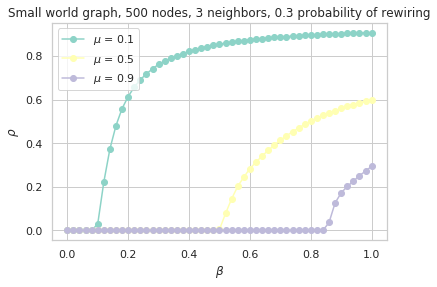

In [61]:
plot_p_simulated(p_sim_sw,'Small world graph, 500 nodes, 3 neighbors, 0.3 probability of rewiring')

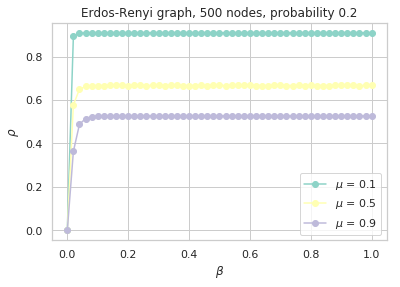

In [62]:
plot_p_simulated(p_sim, 'Erdos-Renyi graph, 500 nodes, probability 0.2')

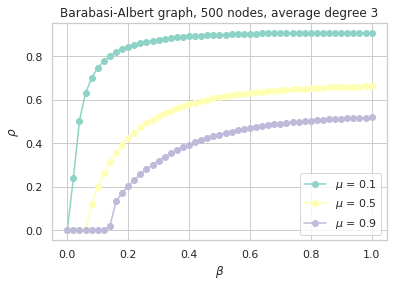

In [63]:
plot_p_simulated(p_sim_ba3, 'Barabasi-Albert graph, 500 nodes, average degree 3')

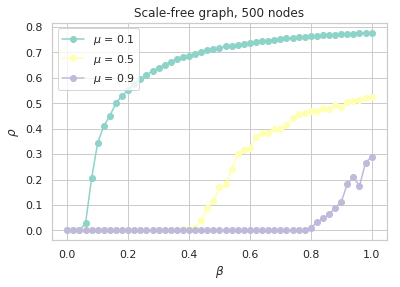

In [64]:
plot_p_simulated(p_sim_sf, 'Scale-free graph, 500 nodes')

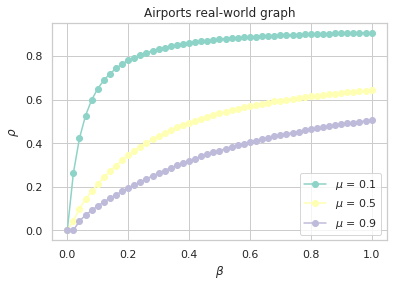

In [65]:
plot_p_simulated(p_sim_airports, 'Airports real-world graph')